# Modeling and Simulation in Python

HIV Model

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)

In [2]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [9]:
init = State(R = 200, L = 0, E = 0, V = 4e-7) #Creating State variables
#R = uninfected CD4 lymphocytes
#L = latently infected cells
#E = actively infected cells
#V = free virions

,values
R,2.000000e+02
L,0.000000e+00
E,0.000000e+00
V,4.000000e-07


In [10]:
system = System(gamma = 1.36, #rate at which uninfected CD4 lymphocytes arise
                tau = 0.2, #the proportion uninfected CD4 lymphocytes are activated
                mu = 0.00136, #death rate of uninfected CD4 lymphocytes
                beta = 0.00027, #infection rate of uninfected CD4 lymphocytes
                p = 0.1, #the proportion of cells that become latently infected cells 
                q = (1 - 0.1), #the number of cells that go straight to being annotated
                alpha = 0.036, #Activation rate of latently infected  cells 
                delta = 0.33, #removal (death) rate of actively infected CD4
                pi = 100, #Rate of production of virons by an actively Infected cell 
                sigma = 2,  #Removal rate of cell-free virus 
                dt=.1) #creating smaller time steps)

,values
gamma,1.36000
tau,0.20000
mu,0.00136
beta,0.00027
p,0.10000
q,0.90000
alpha,0.03600
delta,0.33000
pi,100.00000
sigma,2.00000


In [11]:
def update_func(state, system): #creates function for the change in each of the State variables
    
    new_state = state
    #equations that affect the change in the State variables
    dR = system.gamma*system.tau + system.mu*state.R - system.beta*state.V*state.R
    dL = system.p*system.beta*state.V*state.R - system.mu*state.L - system.alpha*state.L
    dE = system.q*system.beta*state.V*state.R + system.alpha*state.L - system.delta*state.E
    dV = system.pi*state.E - system.sigma*state.V
    #applies the equations to each of the State variables
    new_state.R += dR*system.dt
    new_state.L += dL*system.dt
    new_state.E += dE*system.dt
    new_state.V += dV*system.dt
    
    return new_state

In [17]:
def run_simulation(system, update_func): #Runs a simulation of the system and retuns and a Time Frame
    
    frame = TimeFrame(columns=init.index)
    frame.row[0] = init
    
    for t in linrange(0, 200,.1):
        frame.row[t+.1] = update_func(frame.row[t], system)
    
    return frame

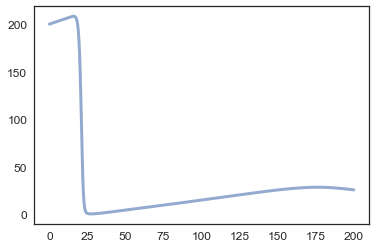

In [25]:
results = run_simulation(system, update_func) #plots R
plot(results.R)


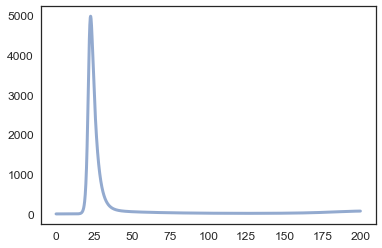

In [26]:
results = run_simulation(system, update_func) #plots V
plot(results.V)
#V needs to be in a seperate plot because the scale is much higher

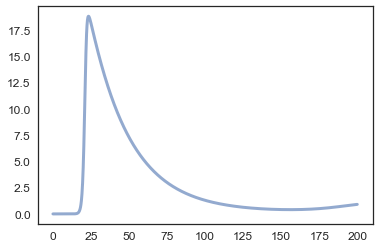

In [27]:
results = run_simulation(system, update_func) #plots L
plot(results.L)

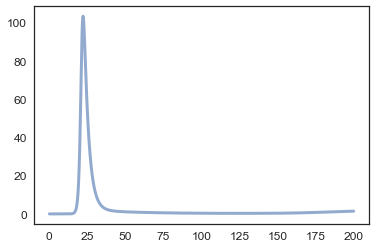

In [28]:
results = run_simulation(system, update_func) #plots E
plot(results.E)